# PSO IMPLEMENTATION: SCHWEFEL FUNCTION

## 1. Configuration

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML, clear_output

In [19]:
FUNCTION_NAME = "Schwefel"
BOUNDS = [-500, 500]
PARTICLES = 50
ITERATIONS = 50
# Adaptive Inertia Parameters
W_MAX = 0.9
W_Min = 0.4
C1 = 1.4
C2 = 1.4

## 2. The Objective Function
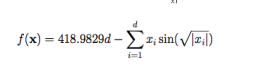

In [20]:
def schwefel_function(x, y):
    # Global Minimum at (420.9687, 420.9687)
    # Value should be close to 0
    return 418.9829 * 2 - (x * np.sin(np.sqrt(np.abs(x))) + y * np.sin(np.sqrt(np.abs(y))))

## 3. Initialization

In [21]:
print(f"Initializing {FUNCTION_NAME} Optimization...")
px = np.random.uniform(BOUNDS[0], BOUNDS[1], PARTICLES)
py = np.random.uniform(BOUNDS[0], BOUNDS[1], PARTICLES)
vx = np.random.uniform(-10, 10, PARTICLES) # Higher velocity for larger map
vy = np.random.uniform(-10, 10, PARTICLES)

pbest_x = px.copy()
pbest_y = py.copy()
pbest_val = schwefel_function(px, py)

min_idx = np.argmin(pbest_val)
gbest_x = pbest_x[min_idx]
gbest_y = pbest_y[min_idx]
gbest_val = pbest_val[min_idx]

history_pos = []
convergence_curve = []

Initializing Schwefel Optimization...


## 4. The Optimization Loop

In [22]:

for i in range(ITERATIONS):
    history_pos.append(np.column_stack((px, py)))
    convergence_curve.append(gbest_val)

    # Adaptive Inertia
    w = W_MAX - ((W_MAX - W_Min) * i / ITERATIONS)

    r1 = np.random.rand(PARTICLES)
    r2 = np.random.rand(PARTICLES)

    vx = (w * vx) + (C1 * r1 * (pbest_x - px)) + (C2 * r2 * (gbest_x - px))
    vy = (w * vy) + (C1 * r1 * (pbest_y - py)) + (C2 * r2 * (gbest_y - py))

    px = px + vx
    py = py + vy
    px = np.clip(px, BOUNDS[0], BOUNDS[1])
    py = np.clip(py, BOUNDS[0], BOUNDS[1])

    current_val = schwefel_function(px, py)

    better_mask = current_val < pbest_val
    pbest_x[better_mask] = px[better_mask]
    pbest_y[better_mask] = py[better_mask]
    pbest_val[better_mask] = current_val[better_mask]

    min_idx = np.argmin(pbest_val)
    if pbest_val[min_idx] < gbest_val:
        gbest_val = pbest_val[min_idx]
        gbest_x = pbest_x[min_idx]
        gbest_y = pbest_y[min_idx]

print(f"Optimization Complete. Best Value: {gbest_val:.6f} at ({gbest_x:.4f}, {gbest_y:.4f})")

Optimization Complete. Best Value: 0.000025 at (420.9683, 420.9689)


## 5.  Report Visualisation

Saved 'schwefel_convergence.png'


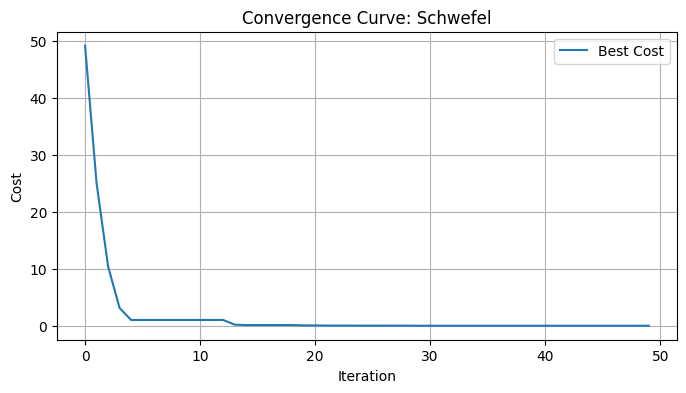

Saved 'schwefel_pso.mp4'


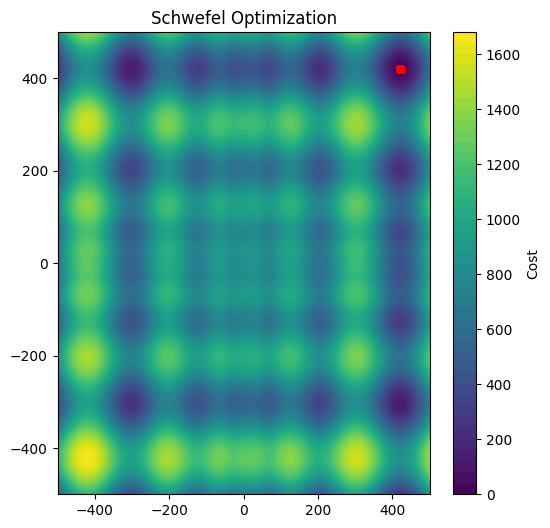

In [23]:



# Plot 1: Convergence Curve
plt.figure(figsize=(8, 4))
plt.plot(convergence_curve, label='Best Cost')
plt.title(f'Convergence Curve: {FUNCTION_NAME}')
plt.xlabel('Iteration')
plt.ylabel('Cost') # Schwefel doesn't always need log scale, but standard is fine
plt.grid(True)
plt.legend()
plt.savefig('schwefel_convergence.png')
print("Saved 'schwefel_convergence.png'")
plt.show()

# Plot 2: Video Animation
fig, ax = plt.subplots(figsize=(6, 6))
x_grid = np.linspace(BOUNDS[0], BOUNDS[1], 100)
y_grid = np.linspace(BOUNDS[0], BOUNDS[1], 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = schwefel_function(X, Y)
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Cost')

scatter = ax.scatter([], [], c='red', s=30, label='Particles')
ax.set_title(f"{FUNCTION_NAME} Optimization")

def animate(frame):
    positions = history_pos[frame]
    scatter.set_offsets(positions)
    return scatter,

anim = FuncAnimation(fig, animate, frames=ITERATIONS, interval=100, blit=True)
anim.save('schwefel_pso.mp4', writer='ffmpeg', fps=15)
print("Saved 'schwefel_pso.mp4'")